In [4]:
%load_ext autoreload
%autoreload 2

import iris
import numpy as np
from matplotlib import pyplot as plt
import iris.quickplot as qplt
from PyCO2SYS import CO2SYS
from PyCO2SYS.api import CO2SYS_wrap as co2sys
import iris.coord_categorisation
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import iris.plot as iplt

Pa_to_uatm = ((1.0/0.9869e-1))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
def extract_and_avg_yr_range(cube,start_year,end_year):
    try:
        iris.coord_categorisation.add_year(cube, 'time', name='year')
    except:
        pass
    loc = np.squeeze(np.where((cube.coord('year').points >= start_year) & (cube.coord('year').points <= end_year)))
    return cube[loc].collapsed('time',iris.analysis.MEAN)


def prepare_cmip_for_co2sys(cube):
    cube_data = cube.data.data
    cube_data[np.where(cube.data.mask)] = np.nan
    return cube_data


def area_avg(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'],iris.analysis.MEAN, weights=grid_areas)


def extract_region(cube,lon_west,lon_east,lat_south,lat_north):
    cube_region_tmp = cube.intersection(longitude=(lon_west, lon_east))
    return cube_region_tmp.intersection(latitude=(lat_south,lat_north))

In [6]:
directory = '/Users/ph290/Downloads/'
# file1 = directory+'test_thetao_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
# file2 = directory+'test_so_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
# file3 = directory+'test_dissic_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
# file4 = directory+'test_talk_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
# file5 = directory+'test_spco2_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc'

file1 = directory+'thetao_Omon_UKESM1-0-LL_historical_ssp585_r1i1p1f2_gn_ym_top.nc'
file2 = directory+'so_Omon_UKESM1-0-LL_historical_ssp585_r1i1p1f2_gn_ym_top.nc'
file3 = directory+'dissic_Omon_UKESM1-0-LL_historical_ssp585_r1i1p1f2_gn_ym_top.nc'
file4 = directory+'talk_Omon_UKESM1-0-LL_historical_ssp585_r1i1p1f2_gn_ym_top.nc'
file5 = directory+'spco2_Omon_UKESM1-0-LL_historical_ssp585_r1i1p1f2_gn_ym_top.nc'

c_thetao = iris.load_cube(file1)
c_so = iris.load_cube(file2)
c_dissic = iris.load_cube(file3)
c_talk = iris.load_cube(file4)
c_spco2 = iris.load_cube(file5)

# first_years = [2000,2004]
# last_years = [2010,2014]

first_years = [2000,2020]
last_years = [2080,2100]

#create an average of the first 5 years
c_thetao_1 = extract_and_avg_yr_range(c_thetao,first_years[0],first_years[1])
c_so_1 = extract_and_avg_yr_range(c_so,first_years[0],first_years[1])
c_dissic_1 = extract_and_avg_yr_range(c_dissic,first_years[0],first_years[1])
c_talk_1 = extract_and_avg_yr_range(c_talk,first_years[0],first_years[1])
c_spco2_1 = extract_and_avg_yr_range(c_spco2,first_years[0],first_years[1])

#create an average of the last 5 years
c_thetao_2 = extract_and_avg_yr_range(c_thetao,last_years[0],last_years[1])
c_so_2 = extract_and_avg_yr_range(c_so,last_years[0],last_years[1])
c_dissic_2 = extract_and_avg_yr_range(c_dissic,last_years[0],last_years[1])
c_talk_2 = extract_and_avg_yr_range(c_talk,last_years[0],last_years[1])
c_spco2_2 = extract_and_avg_yr_range(c_spco2,last_years[0],last_years[1])

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users

In [57]:


c_thetao_data_1 = prepare_cmip_for_co2sys(c_thetao_1[0])
c_so_data_1 = prepare_cmip_for_co2sys(c_so_1[0])
c_dissic_data_1 = prepare_cmip_for_co2sys(c_dissic_1[0])
c_talk_data_1 = prepare_cmip_for_co2sys(c_talk_1[0])
c_spco2_data_1 = prepare_cmip_for_co2sys(c_spco2_1)

c_thetao_data_2 = prepare_cmip_for_co2sys(c_thetao_2[0])
c_so_data_2 = prepare_cmip_for_co2sys(c_so_2[0])
c_dissic_data_2 = prepare_cmip_for_co2sys(c_dissic_2[0])
c_talk_data_2 = prepare_cmip_for_co2sys(c_talk_2[0])
c_spco2_data_2 = prepare_cmip_for_co2sys(c_spco2_2)





Convert data to pandas.DataFrame
Removing nans for efficiency
Computing CO2 parameters
Insert nans back into DataFrame


In [59]:
# dir(ccrs)
# help(np.ma.masked_where)

Convert data to pandas.DataFrame
Removing nans for efficiency
Computing CO2 parameters
Insert nans back into DataFrame


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:614: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate system of latitude and longitude '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_x_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_y_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:614: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate

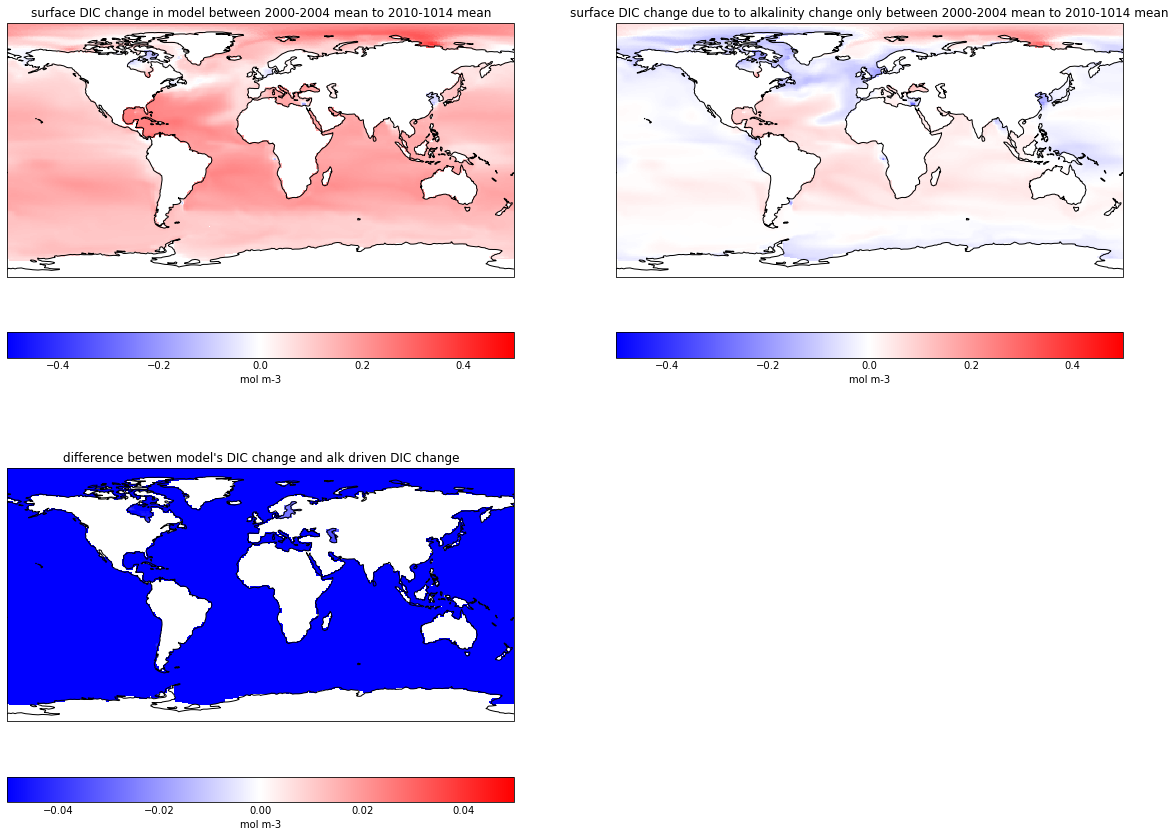

In [67]:
df3 = co2sys(dic=None, alk=c_talk_data_2 * 1.0e3, pco2= c_spco2_data_1 * Pa_to_uatm, fco2=None, pH=None,
    carb=None, bicarb=None, co2aq=None,
    temp_in=c_thetao_data_1,sal=c_so_data_1, si=0, po4=0, nh3=0, h2s=0,
    K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
    buffers_mode="auto", verbose=True)

TCO2 = df3.TCO2.values.reshape((330, 360))

model_dissic_diff = (c_dissic_2[0] - c_dissic_1[0]).data
model_dissic_diff_due_to_alk =(TCO2/1.0e3 - c_dissic_1[0].data)

pcarree = ccrs.PlateCarree()

fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(2, 2)

vmin=-0.15
vmax = 0.15
vmin=-.5
vmax = .5

ax1 = plt.subplot(gs[0, 0], projection=pcarree)
tmp_cube.data = model_dissic_diff
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
contour_result = qplt.pcolormesh(new_cube,vmin = vmin,vmax=vmax,cmap='bwr')
plt.gca().coastlines()
ax1.set_title('surface DIC change in model between 2000-2004 mean to 2010-1014 mean')
# fig.colorbar(contour_result, cax=ax1)

ax2 = plt.subplot(gs[0, 1], projection=pcarree)
tmp_cube.data = model_dissic_diff_due_to_alk
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
qplt.pcolormesh(new_cube,vmin = vmin,vmax=vmax,cmap='bwr')
plt.gca().coastlines()
ax2.set_title('surface DIC change due to to alkalinity change only between 2000-2004 mean to 2010-1014 mean')
    
ax3 = plt.subplot(gs[1, 0], projection=pcarree)
tmp_cube.data = model_dissic_diff_due_to_alk - model_dissic_diff
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
qplt.pcolormesh(new_cube,vmin = -0.050,vmax=0.050,cmap='bwr')
plt.gca().coastlines()
ax3.set_title("difference betwen model's DIC change and alk driven DIC change" )

plt.savefig('/Users/ph290/Downloads/ukesm_dic_change_talk.png',dpi=300)

Convert data to pandas.DataFrame
Removing nans for efficiency
Computing CO2 parameters
Insert nans back into DataFrame


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:614: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate system of latitude and longitude '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_x_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_y_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:614: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate

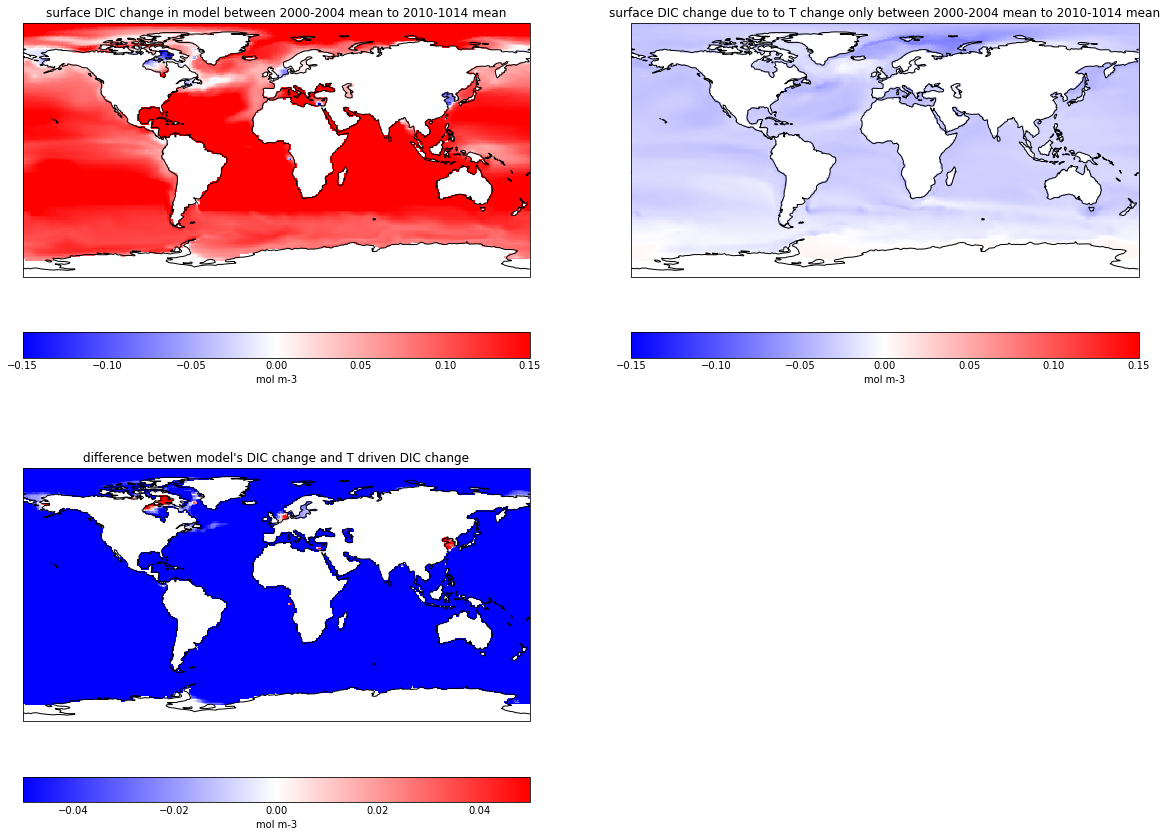

In [87]:
df3 = co2sys(dic=None, alk=c_talk_data_1 * 1.0e3, pco2= c_spco2_data_1 * Pa_to_uatm, fco2=None, pH=None,
    carb=None, bicarb=None, co2aq=None,
    temp_in=c_thetao_data_2,sal=c_so_data_1, si=0, po4=0, nh3=0, h2s=0,
    K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
    buffers_mode="auto", verbose=True)

TCO2 = df3.TCO2.values.reshape((330, 360))

model_dissic_diff = (c_dissic_2[0] - c_dissic_1[0]).data
model_dissic_diff_due_to_alk =(TCO2/1.0e3 - c_dissic_1[0].data)

pcarree = ccrs.PlateCarree()

fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(2, 2)


ax1 = plt.subplot(gs[0, 0], projection=pcarree)
tmp_cube.data = model_dissic_diff
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
contour_result = qplt.pcolormesh(new_cube,vmin = -0.15,vmax=0.150,cmap='bwr')
plt.gca().coastlines()
ax1.set_title('surface DIC change in model between 2000-2004 mean to 2010-1014 mean')
# fig.colorbar(contour_result, cax=ax1)

ax2 = plt.subplot(gs[0, 1], projection=pcarree)
tmp_cube.data = model_dissic_diff_due_to_alk
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
qplt.pcolormesh(new_cube,vmin = -0.150,vmax=0.150,cmap='bwr')
plt.gca().coastlines()
ax2.set_title('surface DIC change due to to T change only between 2000-2004 mean to 2010-1014 mean')
    
ax3 = plt.subplot(gs[1, 0], projection=pcarree)
tmp_cube.data = model_dissic_diff_due_to_alk - model_dissic_diff
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
qplt.pcolormesh(new_cube,vmin = -0.050,vmax=0.050,cmap='bwr')
plt.gca().coastlines()
ax3.set_title("difference betwen model's DIC change and T driven DIC change" )

plt.savefig('/Users/ph290/Downloads/ukesm_dic_change_T.png',dpi=300)

Convert data to pandas.DataFrame
Removing nans for efficiency
Computing CO2 parameters
Insert nans back into DataFrame


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:614: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate system of latitude and longitude '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_x_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_y_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:614: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate

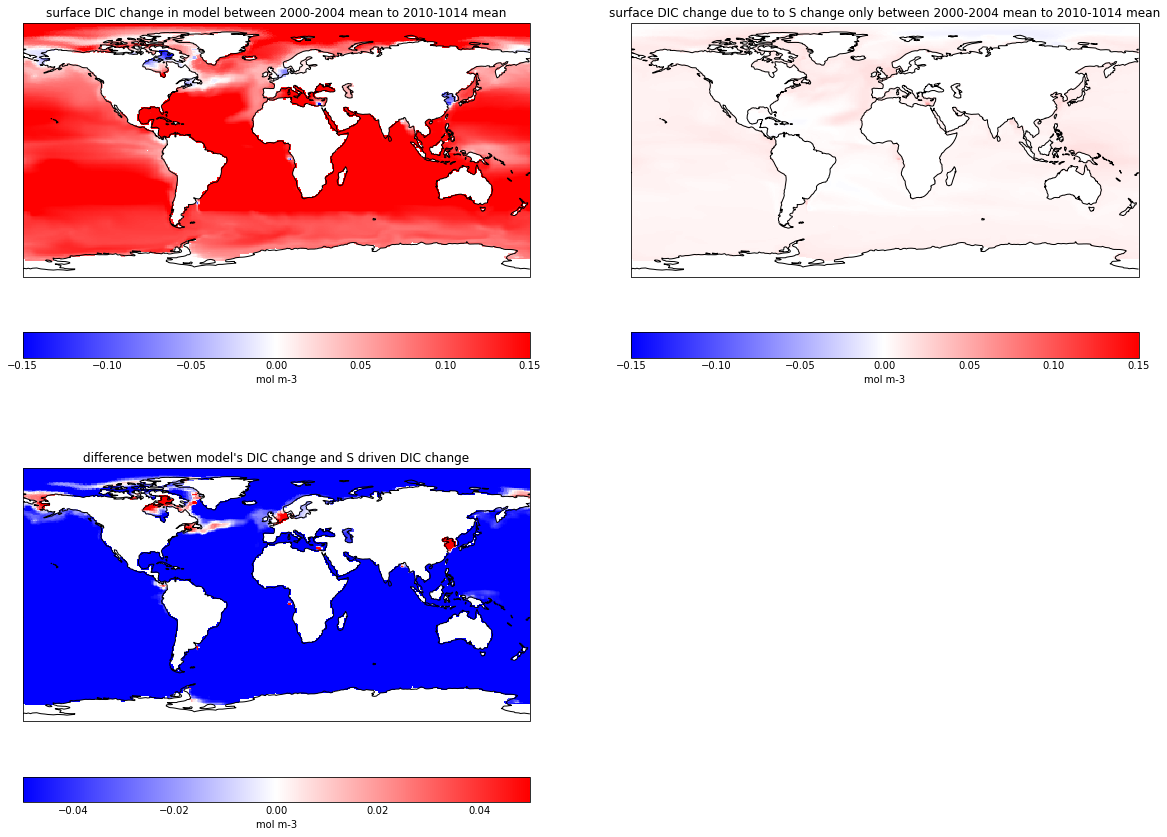

In [62]:
df3 = co2sys(dic=None, alk=c_talk_data_1 * 1.0e3, pco2= c_spco2_data_1 * Pa_to_uatm, fco2=None, pH=None,
    carb=None, bicarb=None, co2aq=None,
    temp_in=c_thetao_data_1,sal=c_so_data_2, si=0, po4=0, nh3=0, h2s=0,
    K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
    buffers_mode="auto", verbose=True)

TCO2 = df3.TCO2.values.reshape((330, 360))

model_dissic_diff = (c_dissic_2[0] - c_dissic_1[0]).data
model_dissic_diff_due_to_alk =(TCO2/1.0e3 - c_dissic_1[0].data)

pcarree = ccrs.PlateCarree()

tmp_cube = c_dissic[0][0].copy()

fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(2, 2)


ax1 = plt.subplot(gs[0, 0], projection=pcarree)
tmp_cube.data = model_dissic_diff
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
contour_result = qplt.pcolormesh(new_cube,vmin = -0.15,vmax=0.150,cmap='bwr')
plt.gca().coastlines()
ax1.set_title('surface DIC change in model between 2000-2004 mean to 2010-1014 mean')
# fig.colorbar(contour_result, cax=ax1)

ax2 = plt.subplot(gs[0, 1], projection=pcarree)
tmp_cube.data = model_dissic_diff_due_to_alk
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
qplt.pcolormesh(new_cube,vmin = -0.150,vmax=0.150,cmap='bwr')
plt.gca().coastlines()
ax2.set_title('surface DIC change due to to S change only between 2000-2004 mean to 2010-1014 mean')
    
ax3 = plt.subplot(gs[1, 0], projection=pcarree)
tmp_cube.data = model_dissic_diff_due_to_alk - model_dissic_diff
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
qplt.pcolormesh(new_cube,vmin = -0.050,vmax=0.050,cmap='bwr')
plt.gca().coastlines()
ax3.set_title("difference betwen model's DIC change and S driven DIC change" )

plt.savefig('/Users/ph290/Downloads/ukesm_dic_change_S.png',dpi=300)

Convert data to pandas.DataFrame
Removing nans for efficiency
Computing CO2 parameters
Insert nans back into DataFrame


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:614: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate system of latitude and longitude '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_x_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_y_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:614: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate

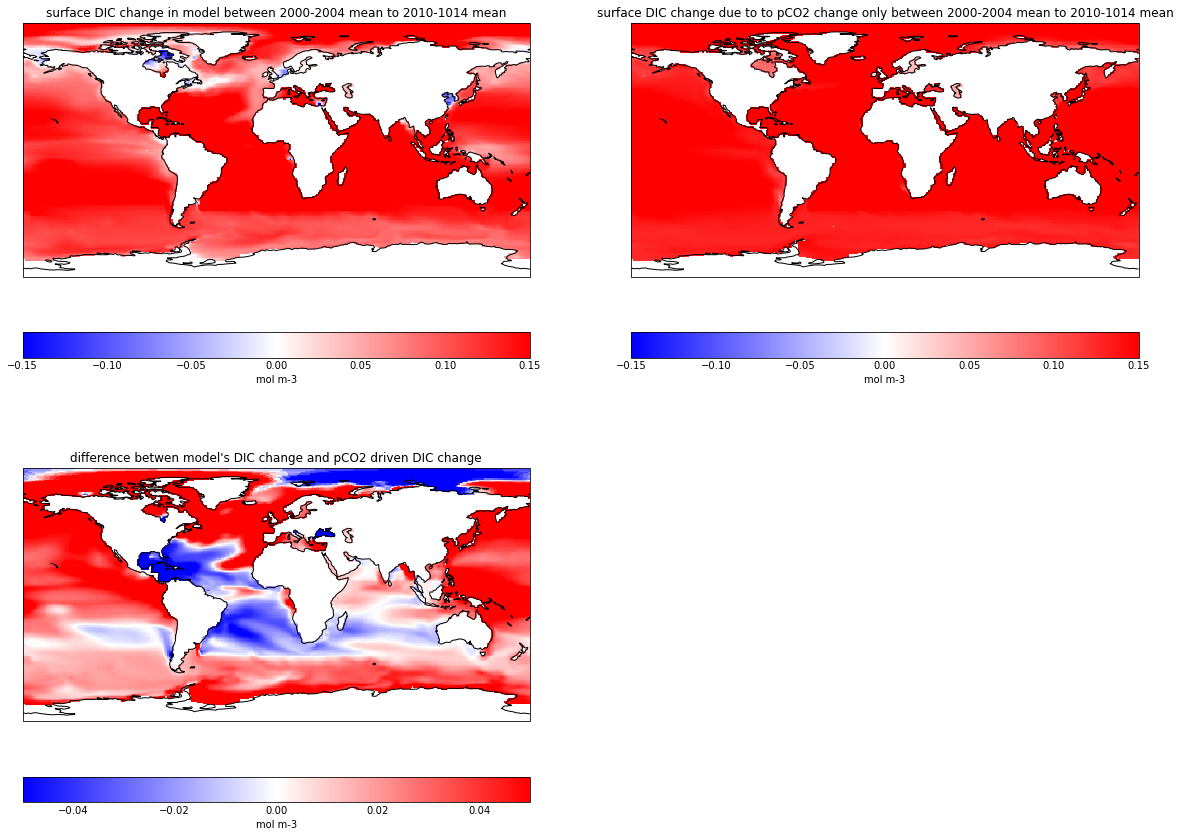

In [63]:
df3 = co2sys(dic=None, alk=c_talk_data_1 * 1.0e3, pco2= c_spco2_data_2 * Pa_to_uatm, fco2=None, pH=None,
    carb=None, bicarb=None, co2aq=None,
    temp_in=c_thetao_data_1,sal=c_so_data_1, si=0, po4=0, nh3=0, h2s=0,
    K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
    buffers_mode="auto", verbose=True)

TCO2 = df3.TCO2.values.reshape((330, 360))

model_dissic_diff = (c_dissic_2[0] - c_dissic_1[0]).data
model_dissic_diff_due_to_alk =(TCO2/1.0e3 - c_dissic_1[0].data)

pcarree = ccrs.PlateCarree()

tmp_cube = c_dissic[0][0].copy()

fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(2, 2)


ax1 = plt.subplot(gs[0, 0], projection=pcarree)
tmp_cube.data = model_dissic_diff
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
contour_result = qplt.pcolormesh(new_cube,vmin = -0.15,vmax=0.150,cmap='bwr')
plt.gca().coastlines()
ax1.set_title('surface DIC change in model between 2000-2004 mean to 2010-1014 mean')
# fig.colorbar(contour_result, cax=ax1)

ax2 = plt.subplot(gs[0, 1], projection=pcarree)
tmp_cube.data = model_dissic_diff_due_to_alk
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
qplt.pcolormesh(new_cube,vmin = -0.150,vmax=0.150,cmap='bwr')
plt.gca().coastlines()
ax2.set_title('surface DIC change due to to pCO2 change only between 2000-2004 mean to 2010-1014 mean')
    
ax3 = plt.subplot(gs[1, 0], projection=pcarree)
tmp_cube.data = model_dissic_diff_due_to_alk - model_dissic_diff
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
qplt.pcolormesh(new_cube,vmin = -0.050,vmax=0.050,cmap='bwr')
plt.gca().coastlines()
ax3.set_title("difference betwen model's DIC change and pCO2 driven DIC change" )

plt.savefig('/Users/ph290/Downloads/ukesm_dic_change_pCO2.png',dpi=300)

Northhern region

In [94]:
file1 = directory+'thetao_Omon_UKESM1-0-LL_historical_ssp585_r1i1p1f2_gn_ym_top_region.nc'
file2 = directory+'so_Omon_UKESM1-0-LL_historical_ssp585_r1i1p1f2_gn_ym_top_region.nc'
file3 = directory+'dissic_Omon_UKESM1-0-LL_historical_ssp585_r1i1p1f2_gn_ym_top_region.nc'
file4 = directory+'talk_Omon_UKESM1-0-LL_historical_ssp585_r1i1p1f2_gn_ym_top_region.nc'
file5 = directory+'spco2_Omon_UKESM1-0-LL_historical_ssp585_r1i1p1f2_gn_ym_top_region.nc'

c_thetao_region = iris.load_cube(file1)
c_so_region = iris.load_cube(file2)
c_dissic_region = iris.load_cube(file3)
c_talk_region = iris.load_cube(file4)
c_spco2_region = iris.load_cube(file5)

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users

In [100]:
first_years = [2000,2020]
last_years = [2080,2100]

#create an average of the first 5 years
c_thetao_1_region = extract_and_avg_yr_range(c_thetao_region,first_years[0],first_years[1])
c_so_1_region = extract_and_avg_yr_range(c_so_region,first_years[0],first_years[1])
c_dissic_1_region = extract_and_avg_yr_range(c_dissic_region,first_years[0],first_years[1])
c_talk_1_region = extract_and_avg_yr_range(c_talk_region,first_years[0],first_years[1])
c_spco2_1_region = extract_and_avg_yr_range(c_spco2_region,first_years[0],first_years[1])

#create an average of the last 5 years
c_thetao_2_region = extract_and_avg_yr_range(c_thetao_region,last_years[0],last_years[1])
c_so_2_region = extract_and_avg_yr_range(c_so_region,last_years[0],last_years[1])
c_dissic_2_region = extract_and_avg_yr_range(c_dissic_region,last_years[0],last_years[1])
c_talk_2_region = extract_and_avg_yr_range(c_talk_region,last_years[0],last_years[1])
c_spco2_2_region = extract_and_avg_yr_range(c_spco2_region,last_years[0],last_years[1])


c_thetao_data_1_region = prepare_cmip_for_co2sys(c_thetao_1_region[0])
c_so_data_1_region = prepare_cmip_for_co2sys(c_so_1_region[0])
c_dissic_data_1_region = prepare_cmip_for_co2sys(c_dissic_1_region[0])
c_talk_data_1_region = prepare_cmip_for_co2sys(c_talk_1_region[0])
c_spco2_data_1_region = prepare_cmip_for_co2sys(c_spco2_1_region)

c_thetao_data_2_region = prepare_cmip_for_co2sys(c_thetao_2_region[0])
c_so_data_2_region = prepare_cmip_for_co2sys(c_so_2_region[0])
c_dissic_data_2_region = prepare_cmip_for_co2sys(c_dissic_2_region[0])
c_talk_data_2_region = prepare_cmip_for_co2sys(c_talk_2_region[0])
c_spco2_data_2_region = prepare_cmip_for_co2sys(c_spco2_2_region)

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/

Convert data to pandas.DataFrame
Removing nans for efficiency
Computing CO2 parameters
Insert nans back into DataFrame


/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:614: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate system of latitude and longitude '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_x_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_y_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:614: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate

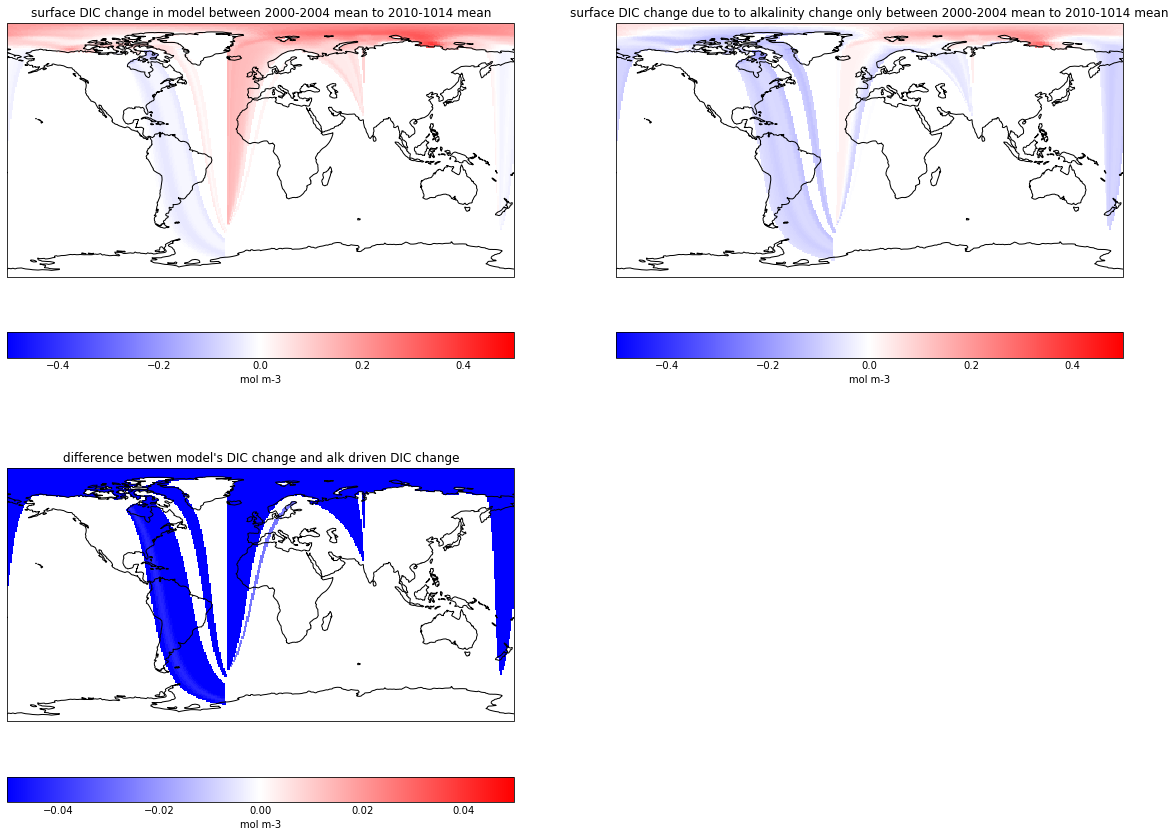

In [106]:
df3 = co2sys(dic=None, alk=c_talk_data_2_region * 1.0e3, pco2= c_spco2_data_1_region * Pa_to_uatm, fco2=None, pH=None,
    carb=None, bicarb=None, co2aq=None,
    temp_in=c_thetao_data_1_region,sal=c_so_data_1_region, si=0, po4=0, nh3=0, h2s=0,
    K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
    buffers_mode="auto", verbose=True)

TCO2 = df3.TCO2.values.reshape((np.shape(c_talk_data_2_region)[0], np.shape(c_talk_data_2_region)[1]))

model_dissic_diff = (c_dissic_2_region[0] - c_dissic_1_region[0]).data
model_dissic_diff_due_to_alk =(TCO2/1.0e3 - c_dissic_1_region[0].data)

pcarree = ccrs.PlateCarree()

fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(2, 2)

vmin=-0.15
vmax = 0.15
vmin=-.5
vmax = .5

tmp_cube = c_dissic_2_region[0].copy()

ax1 = plt.subplot(gs[0, 0], projection=pcarree)
tmp_cube.data = model_dissic_diff
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
contour_result = qplt.pcolormesh(new_cube,vmin = vmin,vmax=vmax,cmap='bwr')
plt.gca().coastlines()
ax1.set_title('surface DIC change in model between 2000-2004 mean to 2010-1014 mean')
# fig.colorbar(contour_result, cax=ax1)

ax2 = plt.subplot(gs[0, 1], projection=pcarree)
tmp_cube.data = model_dissic_diff_due_to_alk
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
qplt.pcolormesh(new_cube,vmin = vmin,vmax=vmax,cmap='bwr')
plt.gca().coastlines()
ax2.set_title('surface DIC change due to to alkalinity change only between 2000-2004 mean to 2010-1014 mean')
    
ax3 = plt.subplot(gs[1, 0], projection=pcarree)
tmp_cube.data = model_dissic_diff_due_to_alk - model_dissic_diff
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
qplt.pcolormesh(new_cube,vmin = -0.050,vmax=0.050,cmap='bwr')
plt.gca().coastlines()
ax3.set_title("difference betwen model's DIC change and alk driven DIC change" )

plt.savefig('/Users/ph290/Downloads/ukesm_dic_change_talk_region.png',dpi=300)

## Timeseries of Arctic DIC change from model, and calculated from only alkalinity changing

In [77]:
file1 = directory+'thetao_Omon_UKESM1-0-LL_historical_ssp585_r1i1p1f2_gn_ym_top_regrid_region.nc'
file2 = directory+'so_Omon_UKESM1-0-LL_historical_ssp585_r1i1p1f2_gn_ym_top_regrid_region.nc'
file3 = directory+'dissic_Omon_UKESM1-0-LL_historical_ssp585_r1i1p1f2_gn_ym_top_regrid_region.nc'
file4 = directory+'talk_Omon_UKESM1-0-LL_historical_ssp585_r1i1p1f2_gn_ym_top_regrid_region.nc'
file5 = directory+'spco2_Omon_UKESM1-0-LL_historical_ssp585_r1i1p1f2_gn_ym_top_regrid_region.nc'

c_thetao_region = iris.load_cube(file1)
c_so_region = iris.load_cube(file2)
c_dissic_region = iris.load_cube(file3)
c_talk_region = iris.load_cube(file4)
c_spco2_region = iris.load_cube(file5)

first_years = [1850,1900]
# last_years = [2080,2100]

#create an average of the first 5 years
c_thetao_1_region = extract_and_avg_yr_range(c_thetao_region,first_years[0],first_years[1])
c_so_1_region = extract_and_avg_yr_range(c_so_region,first_years[0],first_years[1])
c_dissic_1_region = extract_and_avg_yr_range(c_dissic_region,first_years[0],first_years[1])
c_talk_1_region = extract_and_avg_yr_range(c_talk_region,first_years[0],first_years[1])
c_spco2_1_region = extract_and_avg_yr_range(c_spco2_region,first_years[0],first_years[1])

c_thetao_data_1_region = prepare_cmip_for_co2sys(c_thetao_1_region[0])
c_so_data_1_region = prepare_cmip_for_co2sys(c_so_1_region[0])
c_dissic_data_1_region = prepare_cmip_for_co2sys(c_dissic_1_region[0])
c_talk_data_1_region = prepare_cmip_for_co2sys(c_talk_1_region[0])
c_spco2_data_1_region = prepare_cmip_for_co2sys(c_spco2_1_region)

c_talk_data_region = prepare_cmip_for_co2sys(c_talk_region[:,0,:,:])


# df3 = co2sys(dic=None, alk=c_talk_data_2_region * 1.0e3, pco2= c_spco2_data_1_region * Pa_to_uatm, fco2=None, pH=None,
#     carb=None, bicarb=None, co2aq=None,
#     temp_in=c_thetao_data_1_region,sal=c_so_data_1_region, si=0, po4=0, nh3=0, h2s=0,
#     K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
#     buffers_mode="auto", verbose=True)

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users

In [78]:
out_data = c_talk_data_region.copy()
out_data[:] = np.nan

from tqdm import tqdm

for i in tqdm(range(np.shape(c_talk_data_region)[0])):
#     print(i)
    df4 = co2sys(dic=None, alk=c_talk_data_region[i] * 1.0e3, pco2= c_spco2_data_1_region * Pa_to_uatm, fco2=None, pH=None,
        carb=None, bicarb=None, co2aq=None,
        temp_in=c_thetao_data_1_region,sal=c_so_data_1_region, si=0, po4=0, nh3=0, h2s=0,
        K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
        buffers_mode="auto", verbose=True)
    out_data[i,:,:] = df4.TCO2.values.reshape((np.shape(c_talk_data_1_region)[0], np.shape(c_talk_data_1_region)[1]))


100%|██████████| 251/251 [01:05<00:00,  3.86it/s]


In [79]:
c_dissic_region1 = c_dissic_region[:,0,:,:]
c_dissic_region2 = c_dissic_region[:,0,:,:].copy()
c_dissic_region2.data.data[:]= out_data[:]


In [82]:
c_dissic_region1_avg = area_avg(c_dissic_region1)
c_dissic_region2_avg = area_avg(c_dissic_region2 * 1.0e-3)

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [102]:
file6 = directory+'siconc_SImon_UKESM1-0-LL_historical_ssp585_r1i1p1f2_gn_regrid.nc'
c_siconc = area_avg(extract_region(iris.load_cube(file6),-180,180,0.0,90))



/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'siconc'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [109]:
try:
    iris.coord_categorisation.add_year(c_siconc, 'time', name='year')
except:
    pass
try:
    iris.coord_categorisation.add_month(c_siconc, 'time', name='month')
except:
    pass
try:
    iris.coord_categorisation.add_season(c_siconc, 'time', name='season')
except:
    pass



Text(0.5, 0, 'year')

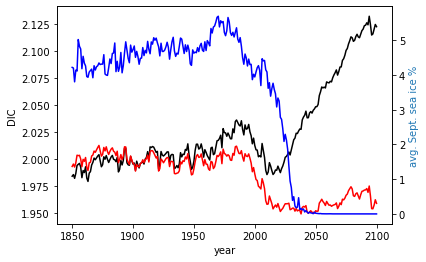

In [144]:

yrs = c_dissic_region1_avg.coord('year').points

fig, ax1 = plt.subplots()
ax1.plot(yrs,c_dissic_region1_avg.data,'k')
ax1.plot(yrs,c_dissic_region2_avg.data,'r')
ax1.set_ylabel('DIC')

ax2 = ax1.twinx() 
color = 'tab:blue'

c_siconc_plot = c_siconc[c_siconc.coord('month').points == 'Sep']
c_siconc_plot_yrs = c_siconc_plot.coord('year').points
ax2.plot(c_siconc_plot_yrs,c_siconc_plot.data,'b')
ax2.set_ylabel('avg. Sept. sea ice %', color=color)
# ax2.set_ylim([3,8])
ax1.set_xlabel('year')

fascinating... is there someunique role alkalinity plays as summer year-round sea-ice is lost,which then diisapears? download sea ice conc.

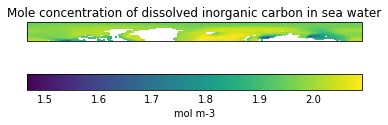

In [87]:
qplt.pcolormesh(c_dissic_region1[0])

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:614: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate system of latitude and longitude '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_x_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_y_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '


Text(0.5, 1.0, 'surface DIC change in model between 2000-2004 mean to 2010-1014 mean')

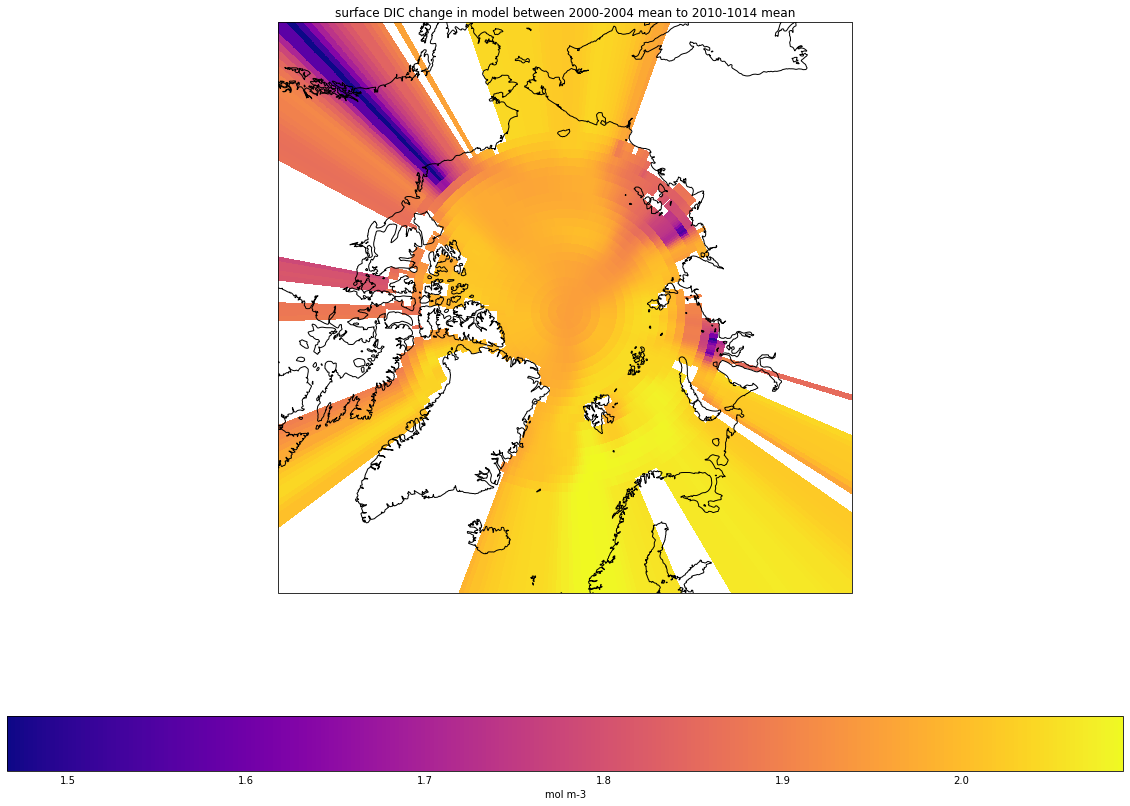

In [97]:
pcarree = ccrs.PlateCarree()
NorthPolarStereo = ccrs.NorthPolarStereo()

fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(1, 1)

ax1 = plt.subplot(gs[0, 0], projection=NorthPolarStereo)
ax1.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())

new_cube, extent = iris.analysis.cartography.project(c_dissic_region1[0], pcarree,nx=400, ny=200)
contour_result = qplt.pcolormesh(new_cube,cmap='plasma')
plt.gca().coastlines()
ax1.set_title('surface DIC change in model between 2000-2004 mean to 2010-1014 mean')

In [89]:
dir(ccrs)

['ABCMeta',
 'AlbersEqualArea',
 'AzimuthalEquidistant',
 'CRS',
 'EckertI',
 'EckertII',
 'EckertIII',
 'EckertIV',
 'EckertV',
 'EckertVI',
 'EqualEarth',
 'EquidistantConic',
 'EuroPP',
 'GOOGLE_MERCATOR',
 'Geocentric',
 'Geodetic',
 'Geostationary',
 'Globe',
 'Gnomonic',
 'InterruptedGoodeHomolosine',
 'LambertAzimuthalEqualArea',
 'LambertConformal',
 'LambertCylindrical',
 'Mercator',
 'Miller',
 'Mollweide',
 'NearsidePerspective',
 'NorthPolarStereo',
 'OSGB',
 'OSNI',
 'Orthographic',
 'PROJ4_VERSION',
 'PlateCarree',
 'Projection',
 'Robinson',
 'RotatedGeodetic',
 'RotatedPole',
 'Sinusoidal',
 'SouthPolarStereo',
 'Stereographic',
 'TransverseMercator',
 'UTM',
 'WGS84_SEMIMAJOR_AXIS',
 'WGS84_SEMIMINOR_AXIS',
 '_BoundaryPoint',
 '_CylindricalProjection',
 '_Eckert',
 '_RectangularProjection',
 '_Satellite',
 '_WarpedRectangularProjection',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__document_these__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec_